# LetsGrowMore #December2021

# Author :- Anand Bhausaheb Kharabe

# Task :- 1.2) Stock Market Prediction And Forecasting Using Stacked LSTM

Level :- Beginner

Language :- Python

Software :- Jupyter Notebook

Dataset Link :- https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [2]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Data Sorting

In [4]:
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
data=df.sort_values(by='Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
data.reset_index(inplace=True)

In [7]:
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Visualization

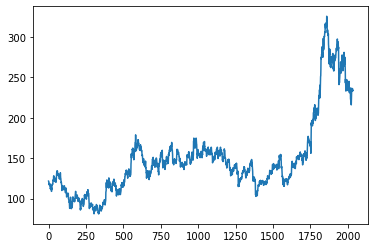

In [8]:
plt.plot(data['Close'])

In [9]:
dff=data['Close']
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

# Min Max Scaler

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Spliting the Dataset

In [11]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

# Convert an array of values into a dataset matrix

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Spliting Data into Train and Test

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating the LSTM Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train,y_train,validation_split=0.1,epochs=78,batch_size=64,verbose=1)

Epoch 1/78
19/19 [==============================] - 2s 125ms/step - loss: 1.3468e-04 - val_loss: 1.1489e-04
Epoch 2/78
19/19 [==============================] - 2s 113ms/step - loss: 1.3177e-04 - val_loss: 1.2903e-04
Epoch 3/78
19/19 [==============================] - 2s 114ms/step - loss: 1.4196e-04 - val_loss: 1.3098e-04
Epoch 4/78
19/19 [==============================] - 2s 115ms/step - loss: 1.3606e-04 - val_loss: 1.2611e-04
Epoch 5/78
19/19 [==============================] - 2s 115ms/step - loss: 1.4387e-04 - val_loss: 1.3046e-04
Epoch 6/78
19/19 [==============================] - 2s 114ms/step - loss: 1.2287e-04 - val_loss: 1.1128e-04
Epoch 7/78
19/19 [==============================] - 2s 124ms/step - loss: 1.2896e-04 - val_loss: 1.2211e-04
Epoch 8/78
19/19 [==============================] - 2s 119ms/step - loss: 1.4926e-04 - val_loss: 1.1875e-04
Epoch 9/78
19/19 [==============================] - 2s 116ms/step - loss: 1.2930e-04 - val_loss: 1.2124e-04
Epoch 10/78
19/19 [=========

19/19 [==============================] - 2s 118ms/step - loss: 1.2361e-04 - val_loss: 1.1516e-04
Epoch 77/78
19/19 [==============================] - 2s 116ms/step - loss: 1.2592e-04 - val_loss: 1.1877e-04
Epoch 78/78
19/19 [==============================] - 2s 115ms/step - loss: 1.2806e-04 - val_loss: 1.0998e-04


# Prediction and Checking Performance

In [45]:
test_predict=model.predict(X_test)

In [46]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[142.05377 ],
       [142.04634 ],
       [139.56337 ],
       [135.22015 ],
       [137.28072 ],
       [137.08586 ],
       [139.86757 ],
       [140.02954 ],
       [138.07248 ],
       [138.01015 ],
       [138.8704  ],
       [142.3432  ],
       [140.68146 ],
       [144.36542 ],
       [146.61278 ],
       [136.792   ],
       [139.19862 ],
       [142.18318 ],
       [141.75641 ],
       [153.0984  ],
       [150.79547 ],
       [150.69664 ],
       [151.04167 ],
       [147.17978 ],
       [152.63982 ],
       [149.72943 ],
       [151.30345 ],
       [154.08592 ],
       [151.74765 ],
       [151.85197 ],
       [153.481   ],
       [149.41133 ],
       [144.85866 ],
       [137.5332  ],
       [139.72609 ],
       [139.57259 ],
       [138.84598 ],
       [135.34857 ],
       [131.77776 ],
       [127.44681 ],
       [128.32254 ],
       [128.04933 ],
       [122.90949 ],
       [125.64685 ],
       [119.7913  ],
       [117.67087 ],
       [121.42652 ],
       [119.4

# Calculating performance

In [47]:
import math
from sklearn.metrics import mean_squared_error

In [48]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.07213446565584625